<a href="https://colab.research.google.com/github/drAshcroft/MAT421_Brian/blob/main/Module_H_Section_22_4_22_5%2C_22_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

22.4 As explained in the last section.  The numerical error of integration can be quite a problem, and grows with integration times.  We look at the pendulum problem to get a clearer insight into the problem

initial state of the pendulum is at top of swing with no velocity
 [[1]
 [0]]
linear transform of euler:
 [[ 1.   0.1]
 [-1.6  1. ]]
linear transform of euler implicit:
 [[ 0.86206897  0.0862069 ]
 [-1.37931034  0.86206897]]
linear transform of trapeziodal:
 [[ 0.92307692  0.09615385]
 [-1.53846154  0.92307692]]


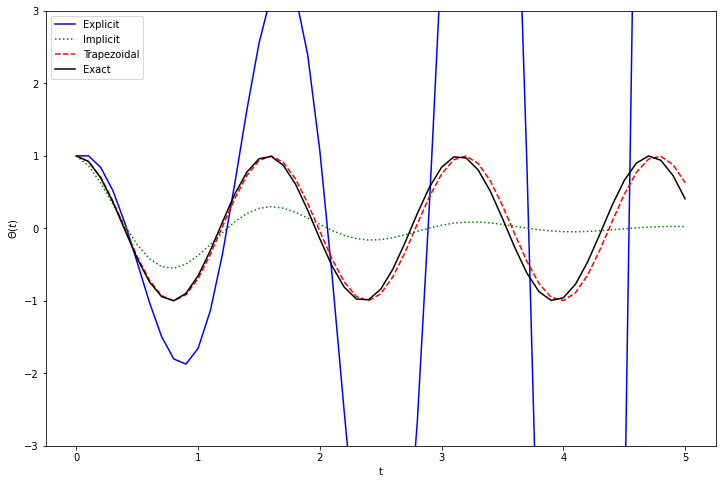

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv


# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])
print('initial state of the pendulum is at top of swing with no velocity\n',s0)

#Invert equation of S(t)=[a b]*[S dS]' to solve for dS.  We include the summation from the previous step
m_euler = np.array([[1, h], 
               [-w**2*h, 1]])
print('linear transform of euler:\n',m_euler)

#Invert equation of S(t)=[a b]*[S d2S]' to solve for dS.  We include the summation from the previous step
m_eulerimplicit = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
print('linear transform of euler implicit:\n',m_eulerimplicit)

#Invert equation of S(t)=[a b]*[S dS]' to solve for dS.  We include the summation from the previous step
m_trapeziodal = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))
print('linear transform of trapeziodal:\n',m_trapeziodal)

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1): #in less programming works, multiply by the change function, then add to the existing values
    s_e[j+1, :] = np.dot(m_euler,s_e[j, :])
    s_i[j+1, :] = np.dot(m_eulerimplicit,s_i[j, :])
    s_t[j+1, :] = np.dot(m_trapeziodal,s_t[j, :])

#plot all the examples    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

We can push the instability even further by stressing the system here a higher frequency causes the error integration to spin out of control, despite the smaller time step.

initial state of the pendulum is at top of swing with no velocity
 [[1]
 [0]]
linear transform of euler:
 [[  1.     0.05]
 [-31.25   1.  ]]
linear transform of euler implicit:
 [[  0.3902439    0.0195122 ]
 [-12.19512195   0.3902439 ]]
linear transform of trapeziodal:
 [[  0.43820225   0.03595506]
 [-22.47191011   0.43820225]]


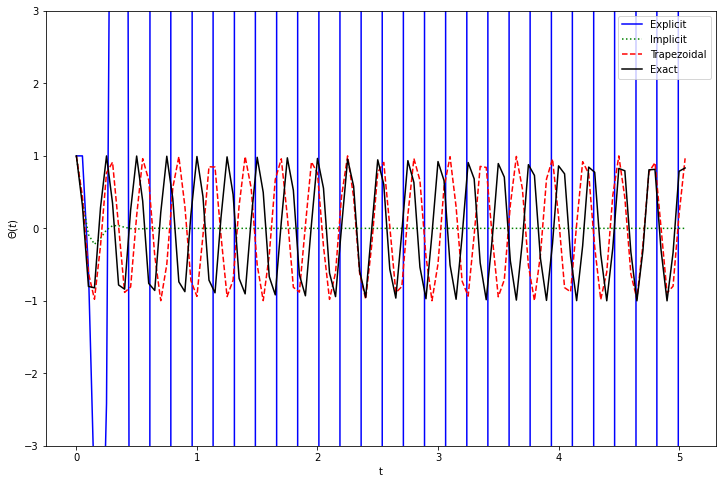

In [9]:
# define step size
h = 0.05
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 25
s0 = np.array([[1], [0]])
print('initial state of the pendulum is at top of swing with no velocity\n',s0)

#Invert equation of S(t)=[a b]*[S dS]' to solve for dS.  We include the summation from the previous step
m_euler = np.array([[1, h], 
               [-w**2*h, 1]])
print('linear transform of euler:\n',m_euler)

#Invert equation of S(t)=[a b]*[S d2S]' to solve for dS.  We include the summation from the previous step
m_eulerimplicit = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
print('linear transform of euler implicit:\n',m_eulerimplicit)

#Invert equation of S(t)=[a b]*[S dS]' to solve for dS.  We include the summation from the previous step
m_trapeziodal = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))
print('linear transform of trapeziodal:\n',m_trapeziodal)

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1): #in less programming works, multiply by the change function, then add to the existing values
    s_e[j+1, :] = np.dot(m_euler,s_e[j, :])
    s_i[j+1, :] = np.dot(m_eulerimplicit,s_i[j, :])
    s_t[j+1, :] = np.dot(m_trapeziodal,s_t[j, :])

#plot all the examples    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

22.5  Simple euler integration methods often fail to be nuemrically stable due to problems of missing integration values between timesteps.  Predictor-Corrector methods avoid these problems by performing the forward step several times with different forward steps to be able to interegate the function's behavior at each point, and then get a better solution to the next sum.

The Runge Kutta method is a very common method to perform these integrations.
4 samples are taken from the function at each point to determine what the next interation value will be corrected.

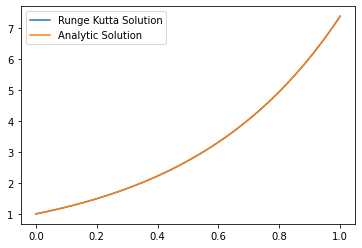

In [31]:
def rk4(f,h,x0,y0,n):
    # Calculating step size
    x=x0    
    y=y0
    t=np.zeros(n+1)
    t[0]=x0
    F=np.zeros(n+1)
    F[0]=y0
    for i in range(n):
        k1 = h * (f(x      , y))
        k2 = h * (f((x+h/2), (y+k1/2)))
        k3 = h * (f((x+h/2), (y+k2/2)))
        k4 = h * (f((x+h)  , (y+k3)))
        k = (k1+2*k2+2*k3+k4)/6
        y = y + k
        F[i+1]=y
        x = x + h
        t[i+1]=x
    return t,F

def velocity(t,x):
  return  x *2

t,F=rk4(velocity, .01,0,1,100)    
plt.plot(t,F,label='Runge Kutta Solution')
plt.plot(t,np.exp(2*t),label='Analytic Solution')
plt.legend()

22.6 Python has built in methods to solve ODEs that take a lot of boilerplate from the programmer.  We will use the scipy implimentations.

the scipy module solve_ivp provides a plethra of choices for solving ODE equations of the form 
dS/dt=F(t,S)

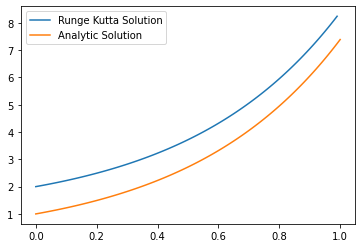

In [39]:
import scipy

#using the equation we tried last
def velocity(t,x):
  return  x *2

t_eval = np.arange(0, 1, 0.01)
#                               fun,      t_span, y0, method='RK45'
sol = scipy.integrate.solve_ivp(velocity, [0, 1], [1], t_eval=t_eval)


plt.plot(sol.t, sol.y[0],label='Runge Kutta Solution')
plt.plot(t,np.exp(2*t),label='Analytic Solution')
plt.legend()

Using a function that is only dependant on the time is also possible

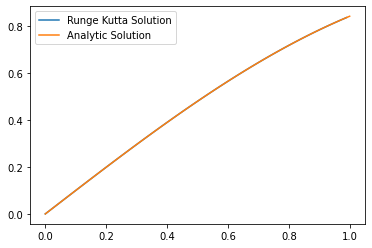

In [42]:
#using the equation we tried last
def velocity(t,x):
  return  np.cos(t) 

t_eval = np.arange(0, 1, 0.01)
#                               fun,      t_span, y0, method='RK45'
sol = scipy.integrate.solve_ivp(velocity, [0, 1], [0], t_eval=t_eval)


plt.plot(sol.t, sol.y[0],label='Runge Kutta Solution')
plt.plot(t,np.sin(t),label='Analytic Solution')
plt.legend()

Last, we can integrate a function that is dependant on the time and position

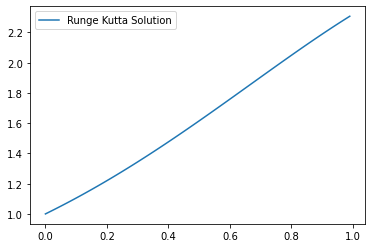

In [44]:
#using the equation we tried last
def velocity(t,x):
  return  np.cos(t) *x

t_eval = np.arange(0, 1, 0.01)
#                               fun,      t_span, y0, method='RK45'
sol = scipy.integrate.solve_ivp(velocity, [0, 1], [1], t_eval=t_eval)


plt.plot(sol.t, sol.y[0],label='Runge Kutta Solution')
plt.legend()